<a href="https://colab.research.google.com/github/reason-me/Ai_202501/blob/main/0408.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OCR 실습

In [ ]:
#토큰나이저 설치
!pip install sentencepiece
#데이터 직렬화 util 설치
!pip install protobuf
#Hugging face 의 trasnformer 설치
!pip install transformers

In [ ]:
# 예제 이미지 다운로드
!rm -rf ocr_test_image
!mkdir ocr_test_image
#!cd ocr_test_image && wget https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/a01-122-02.jpg
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/Hello.jpg
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/test_01.png
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/test_02.png

--2025-04-08 11:00:57--  https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/a01-122-02.jpg
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/001_ocr/a01-122-02.jpg [following]
--2025-04-08 11:00:57--  https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/001_ocr/a01-122-02.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13376 (13K) [image/jpeg]
Saving to: ‘a01-122-02.jpg’

a01-122-02.jpg      100%[===================>]  13.06K  --.-KB/s    in 0s      

2025-04-08 11:00:57 (86.7 MB/s) - ‘a01-122-02.jpg’ saved [13376/13376]

--2025-04-08 11:00:57-- 

패키지 불러오기

In [ ]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

테스트 이미지 불러오기

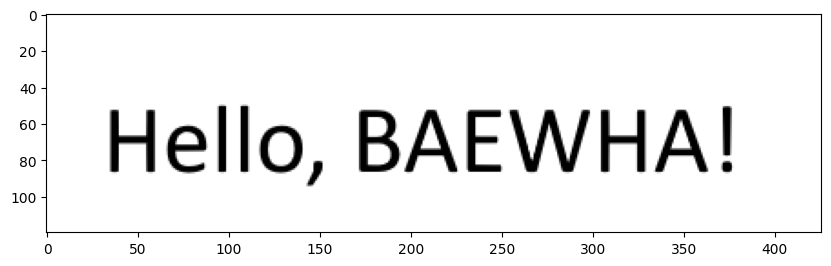

In [ ]:
# Load image
image = Image.open("./ocr_test_image/test_01.png").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

모델 로딩

In [ ]:
print("[INFO] Load pretrained TrOCRProcessor")
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
print("[INFO] Load pretrained VisionEncoderDecoderModel")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

[INFO] Load pretrained TrOCRProcessor
[INFO] Load pretrained VisionEncoderDecoderModel


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

추론하기

In [ ]:
# Preprocess
pixel_values = processor(images=image, return_tensors="pt").pixel_values
# Inference
token_ids = model.generate(pixel_values)
# Postprocess
text_from_image = processor.batch_decode(token_ids, skip_special_tokens=True)[0]

In [ ]:
text_from_image

'Hello , BAEWHARI'